In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from turtle import color
import scipy
import warnings
warnings.filterwarnings('ignore')

In [44]:
df=pd.read_csv('Breast_Cancer.csv')

In [45]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [46]:
df.shape

(4024, 16)

In [47]:
df.size

64384

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [49]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [50]:
df.isnull().sum().sum()

0

In [51]:
df.head(1)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive


In [52]:
df.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [53]:
print(df['Race'].unique())

['White' 'Black' 'Other']


In [54]:
print(df['Marital Status'].unique())

['Married' 'Divorced' 'Single ' 'Widowed' 'Separated']


In [55]:
print(df['T Stage '].unique())

['T1' 'T2' 'T3' 'T4']


In [56]:
print(df['N Stage'].unique())

['N1' 'N2' 'N3']


In [57]:
print(df['6th Stage'].unique())

['IIA' 'IIIA' 'IIIC' 'IIB' 'IIIB']


In [58]:
print(df['A Stage'].unique())

['Regional' 'Distant']


In [59]:
cat_columns=df.select_dtypes(['object']).columns
cat_columns
df[cat_columns]=df[cat_columns].apply(lambda x: pd.factorize(x)[0])

In [60]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,0,0,0,0,0,0,0,0,4,0,0,24,1,60,0
1,50,0,0,1,1,1,1,1,0,35,0,0,14,5,62,0
2,58,0,1,2,2,2,1,1,0,63,0,0,14,7,75,0
3,58,0,0,0,0,0,0,0,0,18,0,0,2,1,84,0
4,47,0,0,1,0,3,0,0,0,41,0,0,3,1,50,0


In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4024.0,53.972167,8.963134,30.0,47.0,54.0,61.0,69.0
Race,4024.0,0.231362,0.580485,0.0,0.0,0.0,0.0,2.0
Marital Status,4024.0,0.646372,1.009498,0.0,0.0,0.0,1.0,4.0
T Stage,4024.0,0.784791,0.765531,0.0,0.0,1.0,1.0,3.0
N Stage,4024.0,0.438370,0.693479,0.0,0.0,0.0,1.0,2.0
6th Stage,4024.0,1.404573,1.245559,0.0,0.0,1.0,3.0,4.0
differentiate,4024.0,0.868290,0.642398,0.0,0.0,1.0,1.0,3.0
Grade,4024.0,0.868290,0.642398,0.0,0.0,1.0,1.0,3.0
A Stage,4024.0,0.022863,0.149485,0.0,0.0,0.0,0.0,1.0
Tumor Size,4024.0,30.473658,21.119696,1.0,16.0,25.0,38.0,140.0


In [64]:
print('min age: ',min(df['Age']))
print('max age: ',max(df['Age']))

min age:  30
max age:  69


In [68]:
df['Age'].value_counts().sort_values().tail()

55    154
53    155
47    161
49    162
46    163
Name: Age, dtype: int64

### Age

In [74]:
values=df['Age'].value_counts().keys().tolist()
print('values: ',values)
count=df['Age'].value_counts().tolist()
print('count: ',count)

values:  [46, 49, 47, 53, 55, 63, 62, 51, 59, 50, 57, 61, 60, 48, 56, 54, 65, 58, 67, 66, 52, 64, 68, 69, 45, 43, 42, 44, 40, 41, 39, 38, 37, 36, 35, 33, 31, 34, 32, 30]
count:  [163, 162, 161, 155, 154, 153, 149, 148, 147, 144, 144, 143, 140, 140, 132, 128, 122, 120, 119, 119, 118, 116, 111, 108, 102, 92, 82, 79, 72, 71, 52, 45, 28, 24, 20, 15, 14, 14, 13, 5]


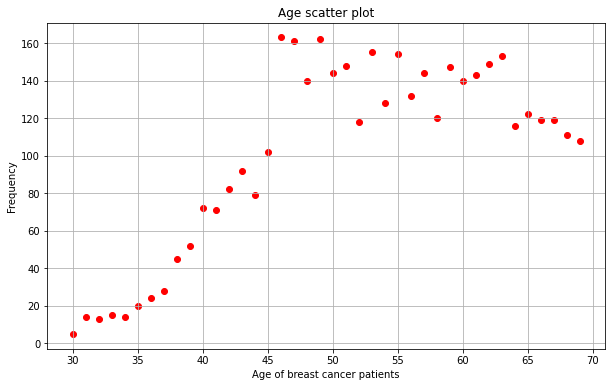

In [80]:
plt.figure(figsize=[10,6])
plt.scatter(x=values,y=count,color='red')
plt.xlabel('Age of breast cancer patients')
plt.ylabel('Frequency')
plt.title('Age scatter plot')
plt.grid()
plt.show()

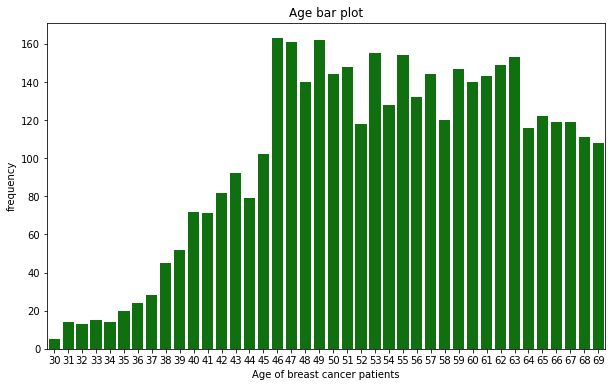

In [115]:
plt.figure(figsize=[10,6])
sns.barplot(x=values,y=count,color='green').set(xlabel='Age of breast cancer patients',ylabel='frequency')
plt.title('Age bar plot')
plt.show()

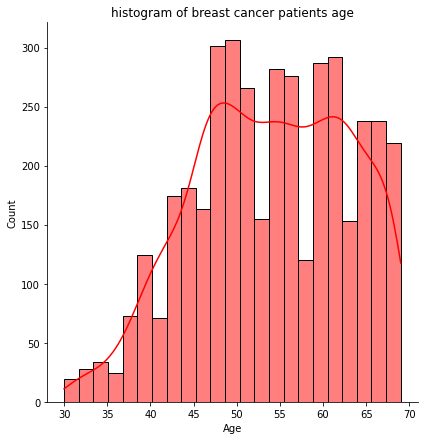

In [95]:
sns.displot(df['Age'],kde=True,color='red',height=6,aspect=1,facet_kws=None)
plt.title('histogram of breast cancer patients age')
plt.show()

### Tumor Size

tumor_size: [15, 25, 30, 20, 35, 18, 40, 17, 12, 22, 21, 16, 50, 60, 10, 14, 13, 23, 11, 45, 19, 24, 55, 27, 70, 28, 32, 9, 80, 7, 26, 8, 65, 42, 31, 38, 90, 37, 5, 33, 100, 75, 34, 6, 29, 51, 52, 36, 47, 120, 4, 48, 2, 63, 43, 85, 39, 3, 46, 44, 62, 68, 57, 61, 1, 54, 41, 58, 74, 53, 95, 72, 56, 140, 130, 76, 110, 59, 83, 105, 49, 78, 66, 82, 101, 69, 84, 97, 81, 92, 77, 133, 73, 79, 96, 64, 86, 94, 104, 125, 115, 123, 107, 103, 108, 98, 88, 87, 117, 67]
tumor_count: [271, 268, 228, 211, 161, 158, 145, 120, 118, 115, 108, 104, 93, 92, 92, 92, 81, 78, 77, 77, 75, 69, 64, 61, 61, 57, 50, 49, 46, 42, 42, 40, 29, 28, 28, 28, 27, 26, 25, 25, 25, 24, 24, 23, 22, 21, 20, 17, 16, 15, 14, 12, 12, 10, 10, 10, 10, 9, 9, 8, 7, 7, 7, 7, 7, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


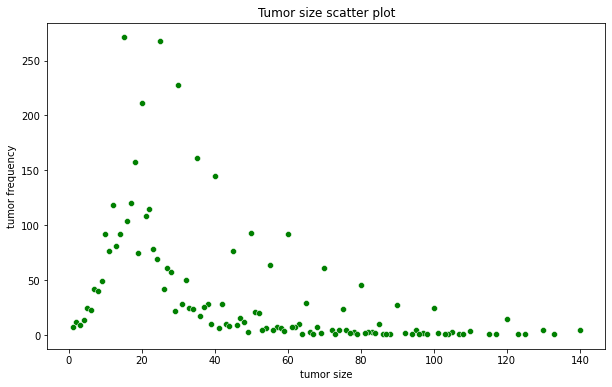

In [110]:
tumor_size=df['Tumor Size'].value_counts().keys().tolist()
tumor_count=df['Tumor Size'].value_counts().tolist()

print('tumor_size:',tumor_size)
print('tumor_count:', tumor_count)
plt.figure(figsize=[10,6])
sns.scatterplot(x=tumor_size,y=tumor_count,color='green')
plt.xlabel('tumor size')
plt.ylabel('tumor frequency')
plt.title('Tumor size scatter plot')
plt.show()

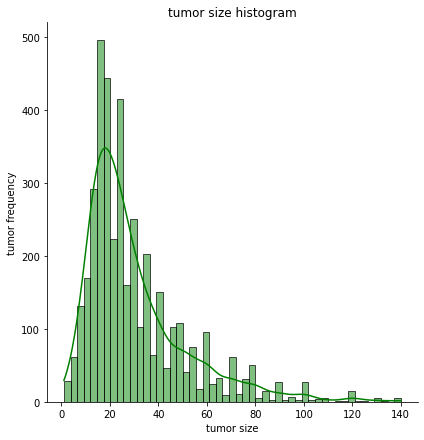

In [113]:
sns.displot(df['Tumor Size'],kde=True,height=6,color='green',aspect=1).set(xlabel='tumor size',ylabel='tumor frequency')
plt.title('tumor size histogram')
plt.show()

### Reginal Node Examined

In [119]:
RNE=df['Regional Node Examined'].value_counts().keys().tolist()
RNE_count=df['Regional Node Examined'].value_counts().tolist()
print('RNE: ',RNE)
print('RNE_count: ',RNE_count)

RNE:  [13, 14, 16, 12, 9, 15, 11, 10, 18, 17, 19, 8, 2, 20, 3, 6, 4, 5, 21, 7, 23, 1, 24, 22, 26, 25, 27, 28, 29, 30, 32, 31, 33, 35, 36, 34, 37, 41, 39, 47, 40, 38, 43, 51, 49, 42, 54, 61, 44, 46, 52, 45, 57, 60]
RNE_count:  [251, 225, 221, 205, 198, 195, 191, 183, 176, 175, 152, 148, 137, 126, 116, 115, 114, 110, 109, 104, 98, 97, 84, 82, 64, 58, 49, 45, 34, 27, 22, 20, 13, 10, 9, 8, 8, 6, 6, 6, 5, 4, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1]


In [116]:
plt.figure(figsize=[10,6])
sns.scatterplot(x=RNE,y=RNE_count,color='blue')
plt.show()

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

### Categorical data EDA

In [121]:
race=df['Race'].value_counts()
race

0    3413
2     320
1     291
Name: Race, dtype: int64

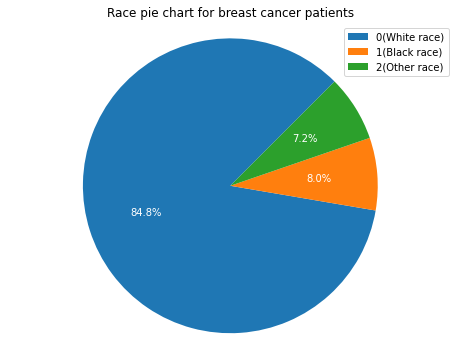

In [148]:
plt.figure(figsize=[8,6])
plt.pie(race,labels=('0(White race)','1(Black race)','2(Other race)'),autopct='%1.1f%%',startangle=45,shadow=False,textprops={'color':'w'})
plt.title('Race pie chart for breast cancer patients')
plt.legend()
plt.axis('equal')
plt.show()

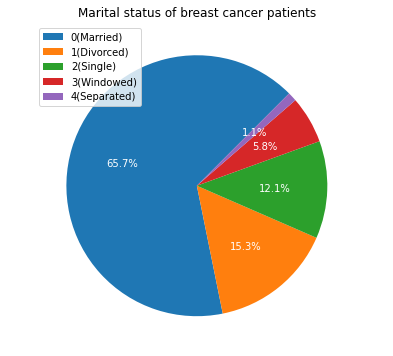

In [143]:
plt.figure(figsize=[8,6])
marital_status=('0(Married)','1(Divorced)','2(Single)','3(Windowed)','4(Separated)')
plt.pie(df['Marital Status'].value_counts(),labels=marital_status,autopct='%1.1f%%',startangle=45,textprops={'color':'w'})
plt.title('Marital status of breast cancer patients')
plt.legend()
plt.show()